In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

data = np.array([
    [30, 20, 10],
    [10, 40, 15],
    [12, 10, 20]
])

# Define heatmap function
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [26]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                    textcolors=["black", "white"],
                    threshold=None, **textkw):
    if data is None:
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = textcolors[int(im.norm(data[i, j]) > threshold)]
            kw.update(color=color)
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

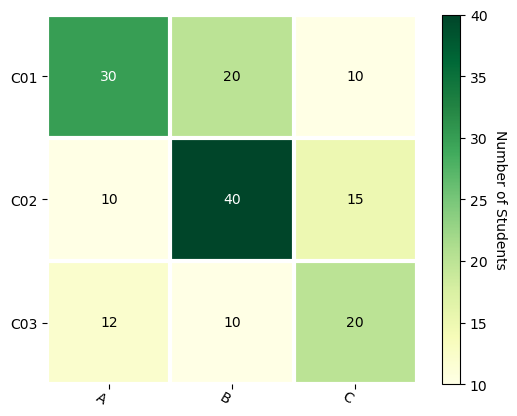

In [24]:
# Plotting
fig, ax = plt.subplots()
im, cbar = heatmap(data, ['C01', 'C02', 'C03'], ['A', 'B', 'C'],
                   ax=ax, cmap="YlGn", cbarlabel="Number of Students")
texts = annotate_heatmap(im, valfmt="{x}")
plt.show()